KL Divergence BEFORE Drift Reduction: 0.3968
KL Divergence AFTER Drift Reduction: 0.0000


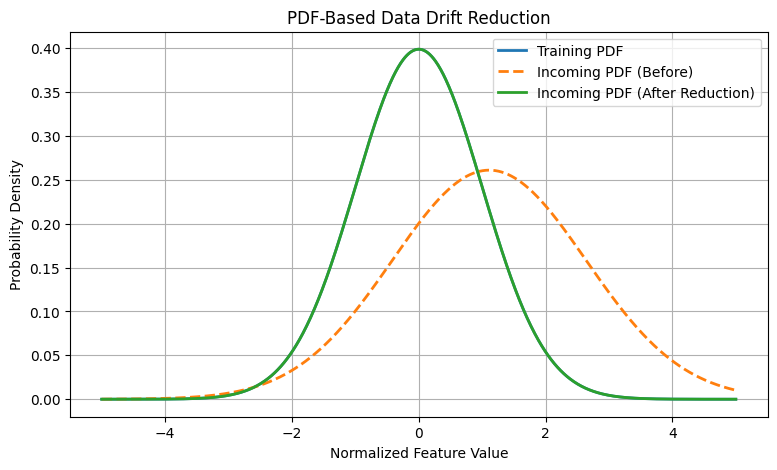

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# --------------------------------
# 1. Generate data
# --------------------------------

train_data = np.random.normal(loc=50, scale=10, size=1000)
test_data = np.random.normal(loc=60, scale=15, size=1000)

# --------------------------------
# 2. Normalize using TRAINING data
# --------------------------------

scaler = StandardScaler()
train_norm = scaler.fit_transform(train_data.reshape(-1, 1)).flatten()
test_norm = scaler.transform(test_data.reshape(-1, 1)).flatten()

# --------------------------------
# 3. Initial Drift Measurement
# --------------------------------

x = np.linspace(-5, 5, 1000)
pdf_train = norm.pdf(x, np.mean(train_norm), np.std(train_norm))
pdf_test = norm.pdf(x, np.mean(test_norm), np.std(test_norm))

kl_before = entropy(pdf_train, pdf_test)
print(f"KL Divergence BEFORE Drift Reduction: {kl_before:.4f}")

# --------------------------------
# 4. DRIFT REDUCTION STEP
# --------------------------------

# (a) Clip extreme values (robustification)
test_norm_clipped = np.clip(test_norm, -3, 3)

# (b) Align mean & variance to reference PDF
test_aligned = (
    (test_norm_clipped - np.mean(test_norm_clipped)) / np.std(test_norm_clipped)
) * np.std(train_norm) + np.mean(train_norm)

# --------------------------------
# 5. Recompute PDFs after reduction
# --------------------------------

pdf_test_reduced = norm.pdf(
    x, np.mean(test_aligned), np.std(test_aligned)
)

kl_after = entropy(pdf_train, pdf_test_reduced)
print(f"KL Divergence AFTER Drift Reduction: {kl_after:.4f}")

# --------------------------------
# 6. Visualization
# --------------------------------

plt.figure(figsize=(9, 5))
plt.plot(x, pdf_train, label="Training PDF", linewidth=2)
plt.plot(x, pdf_test, "--", label="Incoming PDF (Before)", linewidth=2)
plt.plot(x, pdf_test_reduced, label="Incoming PDF (After Reduction)", linewidth=2)
plt.title("PDF-Based Data Drift Reduction")
plt.xlabel("Normalized Feature Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()
